# Homework 2 Solutions

Computational Physics Fall 2025 

# Poblem 1: 2D Motion

We will first define a function that calculates the next frame using the initial parameters and the time. Then we will use VPython to generate it.

In [1]:
import numpy as np                              # To handle vectors
import matplotlib.pyplot as plt                 # To animate each frame
from matplotlib.animation import FuncAnimation  # To Stitch the frames together into an animation
from IPython.display import HTML

[ 3.39432524e+00 -1.33226763e-15] [1.25613234 1.52701009] 0.8861953832196314 0.327952862084969


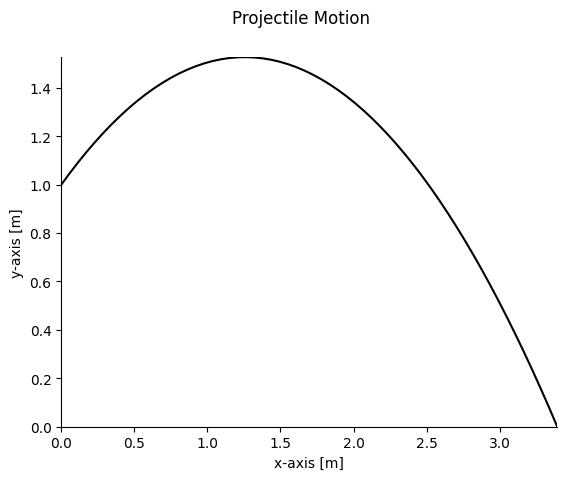

In [44]:
# Define some global constants
g       = 9.8           # m/s^2
v_0     = 5             # m/s
h       = 1             # m
theta   = 40/180*np.pi  # Degrees
small   = 0             # controls the padding on the graph
num     = 60            # Number of frames in the animation

# Calculate the position at a time t given initial conditions
def position(t:float, theta:float=theta, v_0:float = v_0, h:float = h):
    return np.array([v_0 * t * np.cos(theta), h + v_0 * t * np.sin(theta) - 0.5 * g * t**2])

# Calculate the position and time where we will hit the groud.
t_end       = (v_0 * np.sin(theta))/g * (1 + np.sign(np.sin(theta)) * np.sqrt(1 + 2*h*g/((v_0 * np.sin(theta))**2))) if np.sin(theta) != 0 else np.sqrt(2*h/g)
t_max       = v_0*np.sin(theta)/g
endpoint    = position(t_end)                                           # The actual endpoint
maxpoint    = position(t_max) if np.sin(theta) > 0 else np.array([0,h]) # The point that the particle reaches its peak

print(endpoint,maxpoint,t_end,t_max)

# PLOTTING ---------------------------------------------------
# Initialize the figure
fig     = plt.figure();         # The figure
ax      = fig.add_subplot(111); # The graph
path,   = ax.plot([],[],c='k');       # The object that stores the line that we will place on the canvas
x, y    = [], []                # Lists of the x,y coordinates

# Initialize the canvas
def init():
    # Some prettification parameters for the figure
    fig.suptitle("Projectile Motion")
    ax.set_xlabel("x-axis [m]")
    ax.set_ylabel("y-axis [m]")
    ax.spines[["right","top"]].set_visible(False)

    # Set exis limits based on the endpoint
    ax.set_xlim(min(0,endpoint[0])-small,max(0,endpoint[0]) + small)
    ax.set_ylim(-small, maxpoint[1] + small)

    # Return the object that we will draw each time
    return path,

# Generate a new frame
def update(t):
    pos = position(t)       # obtain the position
    x.append(pos[0])        # Update the position lists
    y.append(pos[1])
    path.set_data(x,y)      # Feed the updated data into the line object

    return path,

# Generate the animation
frames      = np.linspace(0, t_end, num)
animation   = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval = 30);

# Show the animation
HTML(animation.to_html5_video())


# Problem 2: Floating Point Numbers

Here we have this 32-bit floating point number and we want to manually interpret it. Here's how to do it.

The way the numbers are stored in the computer is in Binary, but not in the way we expect. We can dramatically increase the range of numbers we can store using the floating point representation. 

## Part A

We will now interpret what we have there

**Single precision** really just means that the number we are storing takes 32 bits in memory. Since we have the snapshot this is not as useful to us. 

Now starting from right to left, the first 22 bits store the **mantissa**. To obtain its value we have
$$
f = \sum_{i=0}^{22} f_i \times 2^{i-23} = 2^{-1} + 2^{-3} + 2^{-4} + 2^{-5} + 2^{-6} = \frac{2^{5} + 2^{3} + 2^{2} + 2 + 1}{2^{6}} = \frac{47}{64}.
$$

Now we move on to consider the **exponent**. In this case this is simply a positive integer expressed in binary. So to read it we should just convert. Namely
$$
e = \sum_{i=0}^{7} e_i 2^{i} = 2 + 2^{3} + 2^{5} + 2^{6} = 106
$$

Finally the **sign** bit simply says that the final number should be multiplied by $(-1)^s = -1$.

## Part B

The final answer is then given by
$$
N = (-1)^{s}\left( 1 + f \right) \times 2^{e-128} = - \left(1+\frac{46}{64}\right) \times 2^{-22} = - \frac{55}{134217728}
$$

# Problem 3: User-defined float

Let's pratictice playing around with float limits

## Part A

We know that the mantissa $f$ given by
$$
f = \sum_{i=0}^{N_f - 1} 2^{i-N_f}f_i, 
$$
must be $f\geq 0$ since $f_i \in \{0,1\}$. So the largest value $f$ can take is when all of its digits are $1$. In binary a number with $N_f$ digits that are all 1 is equal to $2^{N_f} - 1$. Therefore, we have that the largest number $f$ can be is given by
$$
f_{\text{max}} = 2^{-N_f}(2^{N_f} - 1) = 1 - 2^{-N_f}.
$$
Similarly, the minimum is $f_{\text{min}} = 0$. So let's see what happens with the exponent.

From the representation we can see tahat the larger the exponent is, the larger our number. So with $N_e$ bits, the largest exponent we can store is $e_{\text{max}} = 2^{N_e} - 1$. However, this is what represents infinity in our computer, so we can't actually use it. Instead we pick $e_{\text{max}} = 2^{N_e} - 2$. However, in a normal number the exponent can't be zero, it has to be at least 1. Therefore $e_{\text{min}} = 1$.

Putting everything together, we can calculate the largest ans smallest positive normal numbers
$$
\begin{align*}
N_{max} &= 2^{e_{max} - 2^{N_e - 1} + 1}(1+f_{max}) = 2^{2^{N_e-1}+1}(2 - 2^{-N_f}) = 2^{2049}(2-2^{-19}) \approx 10^{617}\\
N_{\text{min}} &= 2^{e_{min} - 2^{N_e - 1} + 1}(1+f_{min}) = 2^{2-2^{N_e-1}}= 2^{2-2^{11}} \approx 4\times 10^{-616} 
\end{align*} 
$$

However, the smallest normal number we can actually store has $e = 0$ which means that it should have smallest nonzero $f$ which is given by $f_{min} = 2^{-N_f}$. Therefore, our smallest positive subnormal number is
$$
\hat N_{\text{min}} = f_{min} 2^{-2^{N_e - 1} + 2} = 2^{-2^{N_e - 1} + 2 - N_f} = 2^{-2065} \approx 1.3 \times 10^{-622}.
$$

## Part B

The machine precision is defined as the smallest $\epsilon > 0$ such that 
$$
1 + \epsilon > 1,
$$
when represented in floating point arithmetic. This is relatively straight forward to figure out using our representation. If we pick $e=2^{N_e - 1}$ (this is setting the first bit to 1 and the rest to zero) we have that our number is given by
$$
N = 1+f
$$
So now $\epsilon = f_{min}$ such that $f_{min} > 0$. What is the smallest nonzero value we can get for $f$? Remember if the number of bits stored is $\hat f$ then $f = e^{-N_f} \hat f$. So the smallest natural number we can store in $\hat f$ is $1$. Therefore,
$$
\epsilon = f_{\text{min}} = 2^{-N_f} = 2^{-19} \approx 1.2 \times 10^{-6},
$$
which, honestly, is not that great. Remember that the true error scales up with the Number as $N\times \epsilon$. 

## Part C

Let the total number of bits be $N$ and the number of bits in the mantissa be $N_f$. Then we have that $N_e = N - N_f - 1$. Plugging this into our formula we have that the largest number as a function of $N_f$ is given by
$$
N_{\text{max}} = 2^{2^{N - N_f - 2}+1}(2 - 2^{-N_f}) \approx 2^{2^{N - N_f - 2}+2}.
$$
We can calculate the logarithm using standard properties to obtain
$$
\log_{10} N_{\text{max}} = (2^{N - N_f - 2}+2) \frac{\log 2}{\log 10}.
$$

Similarly for the smallest positive number we have
$$
N_{\text{min}} = 2^{-2^{N - N_f - 2} + 2 - N_f},
$$
and then
$$
\log_{10} N_{\text{min}} = (-2^{N - N_f - 2} + 2 - N_f) \frac{\log 2}{\log 10}.
$$

Finally, the machine precision is given by $\epsilon = 2^{-N_f}$ so we have
$$
\log_{10} \epsilon = -N_f \frac{\log 2}{\log 10}.
$$

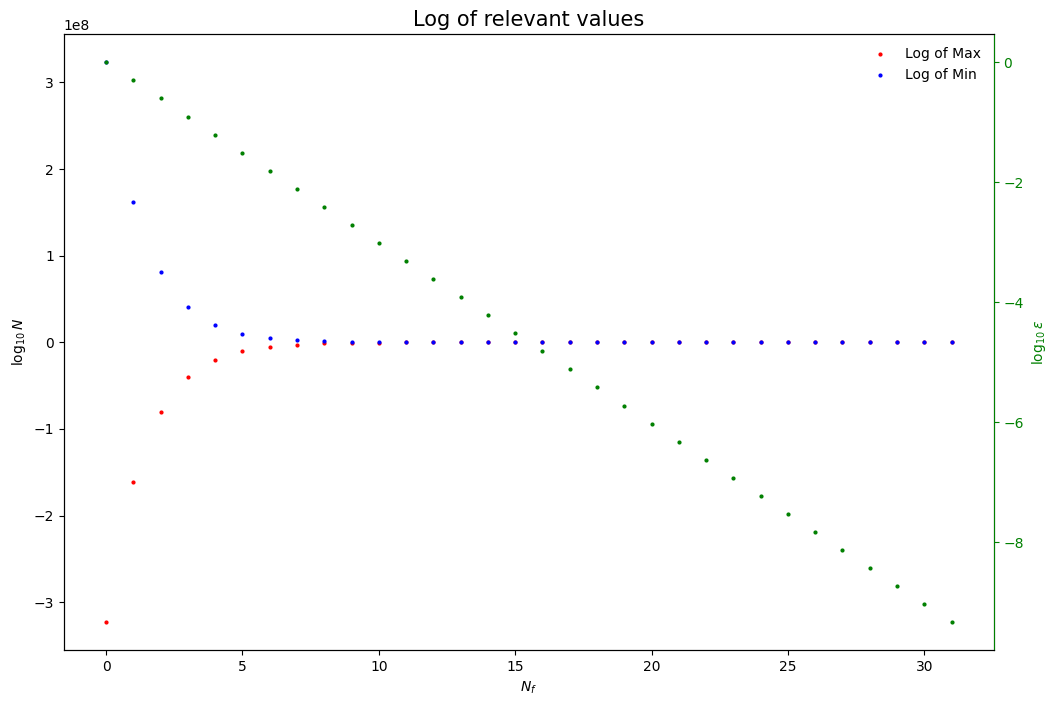

In [134]:
# Here is a plot.
# We define some constants
N       = 32                        # Number of bits
N_f     = np.arange(0,N)            # List of Mantissa lengths
convert = np.log(2)/np.log(10)      # Conversion factor for logs

# Now calculate the values
N_max   = ( 2.**(N - N_f - 2) + 2) * convert
N_min   = (-2.**(N - N_f - 2) + 2 - N_f) * convert
epsilon = -N_f * convert

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Add the plot elements
ax1.scatter(N_f, N_min,   c='r', s= 4, label="Log of Max")
ax1.scatter(N_f, N_max,   c='b', s= 4, label="Log of Min")
ax2.scatter(N_f, epsilon, c='g', s= 4, label="Log of Err")

# Some prettification steps
ax1.set_title("Log of relevant values",fontsize=15)
ax1.legend(frameon=False)
ax1.set_ylabel(r'$\log_{10}N$')
ax1.set_xlabel(r'$N_f$')
ax2.set_ylabel(r'$\log_{10}\epsilon$',color="g")
ax2.spines[["right"]].set_color("g")
ax2.tick_params(axis="y", labelcolor="g",color="g")

# Problem 3: Computing Factorials

We can hit two birds with one stone here. We recursively define a function to calculate the factorial and then restrict the data type.

(1.0, 200.0)

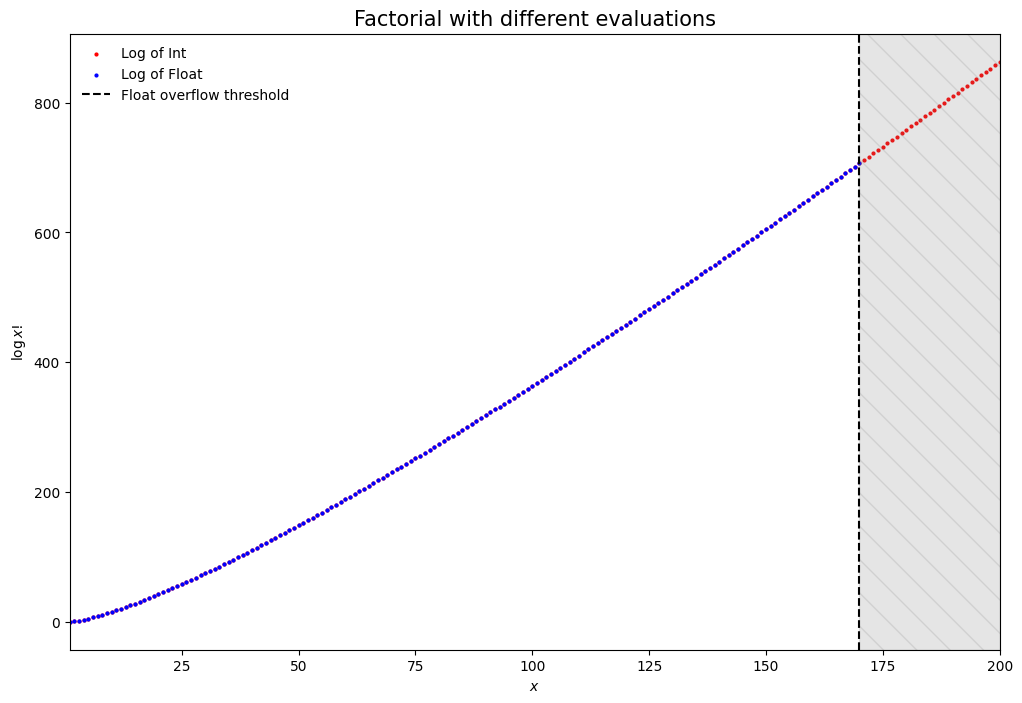

In [ ]:
from math import isfinite,log

# A function to calculate the factorial recursively and store it in an array
def fact(x,factorials:list):
    if x == 1: 
        factorials.append(1)
        return factorials[-1]
    factorials.append(x*fact(x-1,factorials))
    return factorials[-1]

# Let's create two lists
factorials_int      = []
factorials_float    = []

fact(200, factorials_int);
fact(200.,factorials_float);

# Let's fix the infinities
factorials_int      = [log(x) for x in factorials_int]
factorials_float    = [np.log(x) if isfinite(x) else float("Nan") for x in factorials_float]
threshold           = int(np.where([isfinite(x) for x in factorials_float])[0][-1] + 1)

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Add the plot elements
Numbers = np.arange(1,201)
trunc   = -0
powers  = np.arange(100)
ax.scatter(Numbers[-trunc:], np.array(factorials_int[-trunc:]),   c='r', s= 4, label="Log of Int")
ax.scatter(Numbers[-trunc:], np.array(factorials_float[-trunc:]), c='b', s= 4, label="Log of Float")
ax.axvline(threshold, c = 'k', ls = '--', label="Float overflow threshold")
ax.axvspan(threshold, Numbers[-1], color = 'gray', alpha = 0.2, hatch="\\")

# Some prettification steps
ax.set_title("Factorial with different evaluations",fontsize=15)
ax.legend(frameon=False)
ax.set_ylabel(r'$\log x!$')
ax.set_xlabel(r'$x$')
ax.set_xlim(Numbers[0],Numbers[-1])